In [1]:
import pandas as pd

# Load dataset
file_path = r'C:\Users\eoin0\OneDrive - National College of Ireland\NCI\Eoin-NCI\Semester 5\Machine Learning\Project\dft-road-casualty-statistics-collision-2023.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
pd.set_option('display.max_columns', 37)
print("First few rows of the dataset:")
print(df.head())

# Dataset size (rows, columns)
print(f"\nDataset size: {df.shape[0]} rows, {df.shape[1]} columns")

# Descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Fill missing values with the median
df[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']] = df[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']].fillna(df[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']].median())

# Verify if missing values are filled
print(df[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']].isnull().sum())

# Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


C:\Users\eoin0\AppData\Local\Temp\ipykernel_11792\2276942404.py:5: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


First few rows of the dataset:
  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2023010419171           2023           10419171               525060.0   
1  2023010419183           2023           10419183               535463.0   
2  2023010419189           2023           10419189               508702.0   
3  2023010419191           2023           10419191               520341.0   
4  2023010419192           2023           10419192               527255.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                170416.0  -0.202878  51.418974             1   
1                198745.0  -0.042464  51.671155             1   
2                177696.0  -0.435789  51.487777             1   
3                190175.0  -0.263972  51.597575             1   
4                176963.0  -0.168976  51.477324             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                 

In [2]:
# Replace -1 with NaN for missing values
df["speed_limit"] = df["speed_limit"].replace(-1, pd.NA)

# Handle unknown values (e.g., 99)
df["speed_limit"] = df["speed_limit"].replace(99, pd.NA)

# Optionally drop rows with missing or unknown speed limits
df = df[df["speed_limit"].notna()]

# Verify unique values
print(df["speed_limit"].unique())


[20 30 50 40 70 60]


In [3]:
# Overview of data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               104258 non-null  object 
 1   accident_year                                104258 non-null  int64  
 2   accident_reference                           104258 non-null  object 
 3   location_easting_osgr                        104258 non-null  float64
 4   location_northing_osgr                       104258 non-null  float64
 5   longitude                                    104258 non-null  float64
 6   latitude                                     104258 non-null  float64
 7   police_force                                 104258 non-null  int64  
 8   accident_severity                            104258 non-null  int64  
 9   number_of_vehicles                           104258 non-nul

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,enhanced_severity_collision
count,104258.0,104258.000000,1.042580e+05,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.0,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000
mean,2023.0,455389.400247,2.754923e+05,-1.204879,52.366921,27.638397,2.745996,1.820628,1.275461,4.129189,-1.0,4.225565,787.296054,5.294222,35.873602,4.632748,1.757745,3.104155,214.202354,0.509592,1.304629,2.025945,1.689808,1.415632,0.403537,0.345125,1.325404,1.518051,1.721479,1.614255
std,0.0,92259.508425,1.465930e+05,1.349330,1.320790,24.321077,0.467638,0.689053,0.737006,1.929225,0.0,1.464022,1578.472251,1.700894,14.349338,14.731899,2.552435,2.763917,916.212958,2.094497,2.643103,1.695939,1.885524,1.132241,1.837402,1.734161,0.469101,0.810553,0.794875,2.693744
min,2023.0,70537.000000,1.052800e+04,-7.429339,49.914528,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,0.000000,1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
25%,2023.0,393847.250000,1.749012e+05,-2.092920,51.460360,4.000000,3.000000,1.000000,1.000000,3.000000,-1.0,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-1.000000
50%,2023.0,462486.500000,2.149055e+05,-1.082364,51.819044,22.000000,3.000000,2.000000,1.000000,4.000000,-1.0,4.000000,31.000000,6.000000,30.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000
75%,2023.0,529484.750000,3.834010e+05,-0.134348,53.344239,45.000000,3.000000,2.000000,1.000000,6.000000,-1.0,6.000000,539.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000
max,2023.0,655160.000000,1.152174e+06,1.756018,60.252418,99.000000,3.000000,17.000000,70.000000,7.000000,-1.0,6.000000,9176.000000,9.000000,70.000000,99.000000,9.000000,6.000000,9999.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000,7.000000


In [4]:
print(df['road_type'].unique())


[2 6 1 3 9 7]


In [5]:
df['road_type'] = df['road_type'].astype('category')


In [6]:
# Replace invalid values (e.g., -1) with NaN
df['road_type'] = df['road_type'].replace(-1, pd.NA)

# Convert to category after cleanup
df['road_type'] = df['road_type'].astype('category')


In [7]:
# Adjust mapping logic based on actual data
road_type_mapping = {
    1: "Roundabout",
    2: "One way street",
    3: "Dual carriageway",
    6: "Single carriageway",
    7: "Slip road",
    12: "One way street/Slip road",
    -1: pd.NA,  # Data missing
    9: pd.NA    # Unknown
}
df['road_type'] = df['road_type'].replace(road_type_mapping).astype('category')


C:\Users\eoin0\AppData\Local\Temp\ipykernel_11792\2361535780.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['road_type'] = df['road_type'].replace(road_type_mapping).astype('category')


In [8]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   accident_index                               104258 non-null  object  
 1   accident_year                                104258 non-null  int64   
 2   accident_reference                           104258 non-null  object  
 3   location_easting_osgr                        104258 non-null  float64 
 4   location_northing_osgr                       104258 non-null  float64 
 5   longitude                                    104258 non-null  float64 
 6   latitude                                     104258 non-null  float64 
 7   police_force                                 104258 non-null  int64   
 8   accident_severity                            104258 non-null  int64   
 9   number_of_vehicles                           104

In [9]:
# Mappings for the categorical variables based on the provided information

junction_detail_mapping = {
    0: "Not at junction or within 20 metres", 1: "Roundabout", 2: "Mini-roundabout",
    3: "T or staggered junction", 5: "Slip road", 6: "Crossroads", 7: "More than 4 arms (not roundabout)",
    8: "Private drive or entrance", 9: "Other junction", 99: "unknown (self reported)", -1: "Data missing or out of range"
}

junction_control_mapping = {
    0: "Not at junction or within 20 metres", 1: "Authorised person", 2: "Auto traffic signal",
    3: "Stop sign", 4: "Give way or uncontrolled", -1: "Data missing or out of range", 9: "unknown (self reported)"
}

second_road_class_mapping = {
    0: "Not at junction or within 20 metres", 1: "Motorway", 2: "A(M)", 3: "A", 4: "B", 5: "C",
    6: "Unclassified", 9: "Unknown (self rep only)", -1: "Data missing or out of range"
}

pedestrian_crossing_human_control_mapping = {
    0: "None within 50 metres", 1: "Control by school crossing patrol", 2: "Control by other authorised person",
    -1: "Data missing or out of range", 9: "unknown (self reported)"
}

pedestrian_crossing_physical_facilities_mapping = {
    0: "No physical crossing facilities within 50 metres", 1: "Zebra", 4: "Pelican, puffin, toucan or similar non-junction pedestrian light crossing",
    5: "Pedestrian phase at traffic signal junction", 7: "Footbridge or subway", 8: "Central refuge", -1: "Data missing or out of range", 9: "unknown (self reported)"
}

light_conditions_mapping = {
    1: "Daylight", 4: "Darkness - lights lit", 5: "Darkness - lights unlit", 6: "Darkness - no lighting", 
    7: "Darkness - lighting unknown", -1: "Data missing or out of range"
}

weather_conditions_mapping = {
    1: "Fine no high winds", 2: "Raining no high winds", 3: "Snowing no high winds", 4: "Fine + high winds", 
    5: "Raining + high winds", 6: "Snowing + high winds", 7: "Fog or mist", 8: "Other", 9: "Unknown", -1: "Data missing or out of range"
}

road_surface_conditions_mapping = {
    1: "Dry", 2: "Wet or damp", 3: "Snow", 4: "Frost or ice", 5: "Flood over 3cm. deep", 6: "Oil or diesel", 
    7: "Mud", -1: "Data missing or out of range", 9: "unknown (self reported)"
}

special_conditions_at_site_mapping = {
    0: "None", 1: "Auto traffic signal - out", 2: "Auto signal part defective", 3: "Road sign or marking defective or obscured", 
    4: "Roadworks", 5: "Road surface defective", 6: "Oil or diesel", 7: "Mud", -1: "Data missing or out of range", 9: "unknown (self reported)"
}

carriageway_hazards_mapping = {
    0: "None", 1: "Vehicle load on road", 2: "Other object on road", 3: "Previous accident", 4: "Dog on road", 
    5: "Other animal on road", 6: "Pedestrian in carriageway - not injured", 7: "Any animal in carriageway (except ridden horse)",
    -1: "Data missing or out of range", 9: "unknown (self reported)"
}

urban_or_rural_area_mapping = {
    1: "Urban", 2: "Rural", 3: "Unallocated", -1: "Data missing or out of range"
}

did_police_officer_attend_scene_of_accident_mapping = {
    1: "Yes", 2: "No", 3: "No - accident was reported using a self completion form (self rep only)", -1: "Data missing or out of range"
}

# Apply the mappings
df['junction_detail'] = df['junction_detail'].map(junction_detail_mapping).fillna('Unknown')
df['junction_control'] = df['junction_control'].map(junction_control_mapping).fillna('Unknown')
df['second_road_class'] = df['second_road_class'].map(second_road_class_mapping).fillna('Unknown')
df['pedestrian_crossing_human_control'] = df['pedestrian_crossing_human_control'].map(pedestrian_crossing_human_control_mapping).fillna('Unknown')
df['pedestrian_crossing_physical_facilities'] = df['pedestrian_crossing_physical_facilities'].map(pedestrian_crossing_physical_facilities_mapping).fillna('Unknown')
df['light_conditions'] = df['light_conditions'].map(light_conditions_mapping).fillna('Unknown')
df['weather_conditions'] = df['weather_conditions'].map(weather_conditions_mapping).fillna('Unknown')
df['road_surface_conditions'] = df['road_surface_conditions'].map(road_surface_conditions_mapping).fillna('Unknown')
df['special_conditions_at_site'] = df['special_conditions_at_site'].map(special_conditions_at_site_mapping).fillna('Unknown')
df['carriageway_hazards'] = df['carriageway_hazards'].map(carriageway_hazards_mapping).fillna('Unknown')
df['urban_or_rural_area'] = df['urban_or_rural_area'].map(urban_or_rural_area_mapping).fillna('Unknown')
df['did_police_officer_attend_scene_of_accident'] = df['did_police_officer_attend_scene_of_accident'].map(did_police_officer_attend_scene_of_accident_mapping).fillna('Unknown')

# Now, the categorical columns should be transformed into meaningful labels.

# Check the result
print(df.head())


  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2023010419171           2023           10419171               525060.0   
1  2023010419183           2023           10419183               535463.0   
2  2023010419189           2023           10419189               508702.0   
3  2023010419191           2023           10419191               520341.0   
4  2023010419192           2023           10419192               527255.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                170416.0  -0.202878  51.418974             1   
1                198745.0  -0.042464  51.671155             1   
2                177696.0  -0.435789  51.487777             1   
3                190175.0  -0.263972  51.597575             1   
4                176963.0  -0.168976  51.477324             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  01/0

In [10]:
# Create a dictionary for the police_force mapping
police_force_mapping = {
    1: 'Metropolitan Police',
    3: 'Cumbria',
    4: 'Lancashire',
    5: 'Merseyside',
    6: 'Greater Manchester',
    7: 'Cheshire',
    10: 'Northumbria',
    11: 'Durham',
    12: 'North Yorkshire',
    13: 'West Yorkshire',
    14: 'South Yorkshire',
    16: 'Humberside',
    17: 'Cleveland',
    20: 'West Midlands',
    21: 'Staffordshire',
    22: 'West Mercia',
    23: 'Warwickshire',
    30: 'Derbyshire',
    31: 'Nottinghamshire',
    32: 'Lincolnshire',
    33: 'Leicestershire',
    34: 'Northamptonshire',
    35: 'Cambridgeshire',
    36: 'Norfolk',
    37: 'Suffolk',
    40: 'Bedfordshire',
    41: 'Hertfordshire',
    42: 'Essex',
    43: 'Thames Valley',
    44: 'Hampshire',
    45: 'Surrey',
    46: 'Kent',
    47: 'Sussex',
    48: 'City of London',
    50: 'Devon and Cornwall',
    52: 'Avon and Somerset',
    53: 'Gloucestershire',
    54: 'Wiltshire',
    55: 'Dorset',
    60: 'North Wales',
    61: 'Gwent',
    62: 'South Wales',
    63: 'Dyfed-Powys',
    91: 'Northern (Discontinued in 2019)',
    92: 'Grampian (Discontinued in 2019)',
    93: 'Tayside (Discontinued in 2019)',
    94: 'Fife (Discontinued in 2019)',
    95: 'Lothian and Borders (Discontinued in 2019)',
    96: 'Central (Discontinued in 2019)',
    97: 'Strathclyde (Discontinued in 2019)',
    98: 'Dumfries and Galloway (Discontinued in 2019)',
    99: 'Police Scotland (Introduced in 2019)',
}

# Apply the mapping to the 'police_force' column in your DataFrame
df['police_force'] = df['police_force'].map(police_force_mapping)

# Verify unique values after fixing
unique_police_forces = df['police_force'].unique()
print(unique_police_forces)



['Metropolitan Police' 'Cumbria' 'Lancashire' 'Merseyside'
 'Greater Manchester' 'Cheshire' 'Northumbria' 'Durham' 'North Yorkshire'
 'West Yorkshire' 'South Yorkshire' 'Humberside' 'Cleveland'
 'West Midlands' 'Staffordshire' 'West Mercia' 'Warwickshire' 'Derbyshire'
 'Nottinghamshire' 'Lincolnshire' 'Leicestershire' 'Northamptonshire'
 'Cambridgeshire' 'Norfolk' 'Suffolk' 'Bedfordshire' 'Hertfordshire'
 'Essex' 'Thames Valley' 'Hampshire' 'Surrey' 'Kent' 'Sussex'
 'City of London' 'Devon and Cornwall' 'Avon and Somerset'
 'Gloucestershire' 'Wiltshire' 'Dorset' 'North Wales' 'Gwent'
 'South Wales' 'Dyfed-Powys' 'Police Scotland (Introduced in 2019)']


In [11]:
# Check the column names in the DataFrame
print(df.columns)


Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location',
       'enhanced_severity_collision'],
      dtype='object')


In [12]:
# Create a dictionary for the enhanced_severity_collision mapping
enhanced_collision_severity_mapping = {
    1: 'Fatal',
    5: 'Very Serious',
    6: 'Moderately Serious',
    7: 'Less Serious',
    3: 'Slight',
    -1: 'Data missing or out of range'
}

# Apply the mapping to the 'enhanced_severity_collision' column in your DataFrame
df['enhanced_severity_collision'] = df['enhanced_severity_collision'].map(enhanced_collision_severity_mapping)

# Verify unique values after mapping
unique_collision_severity = df['enhanced_severity_collision'].unique()
print(unique_collision_severity)


['Data missing or out of range' 'Less Serious' 'Slight' 'Very Serious'
 'Moderately Serious' 'Fatal']


In [13]:
# Day of the week mapping
day_of_week_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Apply the day of week mapping to 'day_of_week' column
df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)

# Clean and handle the 'time' column
df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.strftime('%H:%M')  # Coerce invalid times to NaT
df['time'] = df['time'].fillna('Unknown')  # Reassign to avoid inplace warning

# Ensure 'number_of_vehicles' and 'number_of_casualties' are numeric
df['number_of_vehicles'] = pd.to_numeric(df['number_of_vehicles'], errors='coerce')
df['number_of_casualties'] = pd.to_numeric(df['number_of_casualties'], errors='coerce')

# Handle NaN values (e.g., replacing with 0)
df['number_of_vehicles'] = df['number_of_vehicles'].fillna(0)
df['number_of_casualties'] = df['number_of_casualties'].fillna(0)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

# Verify changes
print(df.head())


C:\Users\eoin0\AppData\Local\Temp\ipykernel_11792\1029015063.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.strftime('%H:%M')  # Coerce invalid times to NaT


  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2023010419171           2023           10419171               525060.0   
1  2023010419183           2023           10419183               535463.0   
2  2023010419189           2023           10419189               508702.0   
3  2023010419191           2023           10419191               520341.0   
4  2023010419192           2023           10419192               527255.0   

   location_northing_osgr  longitude   latitude         police_force  \
0                170416.0  -0.202878  51.418974  Metropolitan Police   
1                198745.0  -0.042464  51.671155  Metropolitan Police   
2                177696.0  -0.435789  51.487777  Metropolitan Police   
3                190175.0  -0.263972  51.597575  Metropolitan Police   
4                176963.0  -0.168976  51.477324  Metropolitan Police   

   accident_severity  number_of_vehicles  number_of_casualties       date  \
0                  3       

In [14]:
# Drop the specified columns from the DataFrame
df_cleaned = df.drop(columns=['local_authority_district', 'local_authority_ons_district', 'local_authority_highway'])

# Check the first few rows of the cleaned DataFrame to ensure the columns were dropped
df_cleaned.head()


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,10419171,525060.0,170416.0,-0.202878,51.418974,Metropolitan Police,3,1,1,2023-01-01,Sunday,01:24,5,0,One way street,20,Other junction,Give way or uncontrolled,C,0,Control by other authorised person,Pedestrian phase at traffic signal junction,Darkness - lights lit,Other,Wet or damp,None,None,Urban,Yes,2,E01003383,Data missing or out of range
1,2023010419183,2023,10419183,535463.0,198745.0,-0.042464,51.671155,Metropolitan Police,3,3,2,2023-01-01,Sunday,02:25,6,0,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,Zebra,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,2,E01001547,Data missing or out of range
2,2023010419189,2023,10419189,508702.0,177696.0,-0.435789,51.487777,Metropolitan Police,3,2,1,2023-01-01,Sunday,03:50,3,437,Roundabout,30,Roundabout,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,2,E01002448,Data missing or out of range
3,2023010419191,2023,10419191,520341.0,190175.0,-0.263972,51.597575,Metropolitan Police,3,2,1,2023-01-01,Sunday,02:13,3,5,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Unknown,Dry,None,None,Urban,Yes,2,E01000129,Data missing or out of range
4,2023010419192,2023,10419192,527255.0,176963.0,-0.168976,51.477324,Metropolitan Police,3,2,1,2023-01-01,Sunday,01:42,3,3220,Single carriageway,30,Private drive or entrance,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,2,E01004583,Data missing or out of range


In [15]:
list(df.columns)


['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location',
 'enhanced_severity_collision']

In [16]:
# Verify the result
df_cleaned.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location',
       'enhanced_severity_collision'],
      dtype='object')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Filter out rows where the target column has these unwanted categories
filtered_df = df[~df['urban_or_rural_area'].isin(['Data missing or out of range', 'Unallocated'])]

# Define features and target variable
X = filtered_df.select_dtypes(include=['float64', 'int64'])
y = filtered_df['urban_or_rural_area']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# K-Nearest Neighbours (K-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Evaluate K-Nearest Neighbours (K-NN)
print("K-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-NN Classification Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.8563549160671463
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       Rural       0.90      0.63      0.74      6736
       Urban       0.84      0.97      0.90     14114

    accuracy                           0.86     20850
   macro avg       0.87      0.80      0.82     20850
weighted avg       0.86      0.86      0.85     20850

K-NN Accuracy: 0.8649400479616307
K-NN Classification Report:
               precision    recall  f1-score   support

       Rural       0.84      0.71      0.77      6736
       Urban       0.87      0.94      0.90     14114

    accuracy                           0.86     20850
   macro avg       0.86      0.83      0.84     20850
weighted avg       0.86      0.86      0.86     20850



Here’s a breakdown of the metrics in your classification report:

### **Overall Results**

#### **Accuracy**
- **Logistic Regression Accuracy**: 0.856 (~85.6%)
- **K-NN Accuracy**: 0.865 (~86.5%)
  - **Interpretation**: Both models correctly predicted about 85-86% of the test data. K-NN slightly outperforms Logistic Regression in this case.

### **Per-Class Metrics**

Each class (Urban and Rural) has three key metrics:

#### **Precision**
- Precision measures how many of the predicted positives are actually correct.
- Formula: \( \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} \)

  **Logistic Regression**:
  - **Rural**: 0.90 (90% of instances predicted as Rural are correct).
  - **Urban**: 0.84 (84% of instances predicted as Urban are correct).

  **K-NN**:
  - **Rural**: 0.84 (lower than Logistic Regression).
  - **Urban**: 0.87 (higher than Logistic Regression).

  **Summary**: K-NN is more precise for Urban, but Logistic Regression is more precise for Rural.

#### **Recall**
- Recall measures how many of the actual positives are correctly identified.
- Formula: \( \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \)

  **Logistic Regression**:
  - **Rural**: 0.63 (Logistic Regression misses many Rural instances).
  - **Urban**: 0.97 (Logistic Regression is very good at identifying Urban instances).

  **K-NN**:
  - **Rural**: 0.71 (better than Logistic Regression at identifying Rural instances).
  - **Urban**: 0.94 (slightly less effective than Logistic Regression).

  **Summary**: K-NN has better recall for Rural, while Logistic Regression is better for Urban.

#### **F1-Score**
- The harmonic mean of precision and recall. It balances the two metrics.
- Formula: \( \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)

  **Logistic Regression**:
  - **Rural**: 0.74 (relatively low, dragged down by poor recall).
  - **Urban**: 0.90 (very strong performance).

  **K-NN**:
  - **Rural**: 0.77 (slightly better balance of precision and recall than Logistic Regression).
  - **Urban**: 0.90 (on par with Logistic Regression).

  **Summary**: K-NN achieves a better balance for Rural predictions, but both models perform equally well for Urban.

### **Averages**

#### **Macro Average**
- Simple average of metrics across all classes, treating each class equally.
- Highlights performance disparities between classes.
- For both models:
  - Macro average is lower than the weighted average, reflecting the lower recall for Rural predictions.

#### **Weighted Average**
- Accounts for the class imbalance by weighting each class's metric by its support (number of instances).
- Gives a better overall view when classes are imbalanced (e.g., more Urban than Rural instances in your data).
- The weighted averages for both models align closely with their overall accuracy (~85-86%).

### **Conclusion**
- **Logistic Regression**: Better suited for Urban predictions due to its high recall for Urban and strong precision for Rural.
- **K-NN**: More balanced overall, with better performance on Rural predictions.
- **Next Steps**: If Rural classification is more critical, K-NN might be preferred. If Urban accuracy is paramount, Logistic Regression is a solid choice.

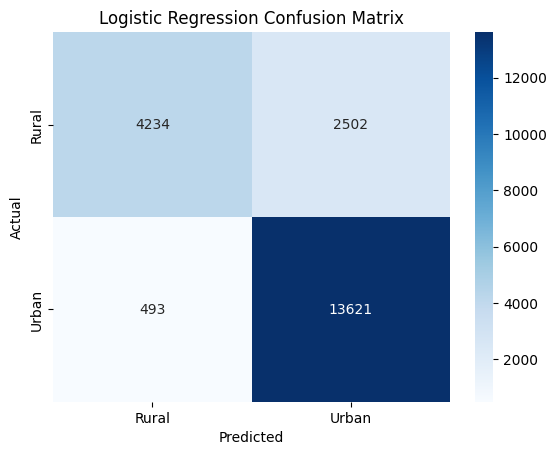

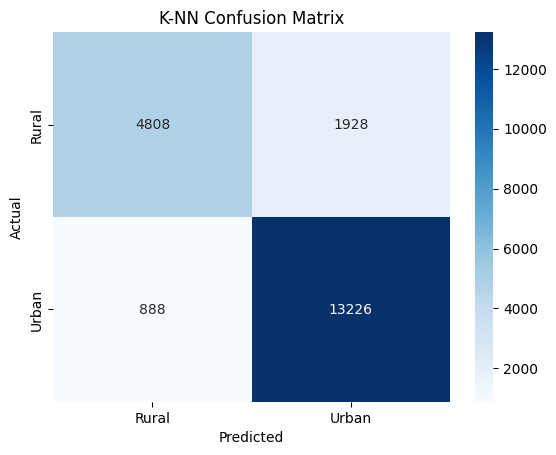

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Rural', 'Urban'], yticklabels=['Rural', 'Urban'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-NN confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Rural', 'Urban'], yticklabels=['Rural', 'Urban'])
plt.title('K-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
